# Chapter 6.4 - Plotting with pandas

Pandas has a plotting interface that uses matplotlib to create visualizations of your data. We will use the SPC tornado dataset to explore some of these visualizations.

There are major types of plots provided by the pandas matplotlib interface.

The ```df.plot()``` method will create a line plot based on the input data. However, you can make many other types of plots:

Example from the <a href=https://pandas.pydata.org/docs/user_guide/visualization.html>pandas</a> documentation for ```df.plot.bar()```:

![Bar Chart example](https://pandas.pydata.org/docs/_images/bar_plot_ex.png)

Example for ```df.plot.barh()```:

![Horizontal Bar Chart example](https://pandas.pydata.org/docs/_images/barh_plot_stacked_ex.png)

Example for ```df.plot.hist()```:

![Histogram Example](https://pandas.pydata.org/docs/_images/hist_new.png)

Example for ```df.plot.box()```:

![Boxplot Example](https://pandas.pydata.org/docs/_images/box_plot_new.png)

Example for ```df.plot.area()```:

![Area plot example](https://pandas.pydata.org/docs/_images/area_plot_stacked.png)

Example for ```df.plot.scatter()```:

![Scatterplot Example](https://pandas.pydata.org/docs/_images/scatter_plot.png)

Example for ```df.plot.hexbin()```:

![Hexbin Example](https://pandas.pydata.org/docs/_images/hexbin_plot.png)

Example for ```df.plot.pie()```:

![Pieplot Example](https://pandas.pydata.org/docs/_images/series_pie_plot.png)



Download the tornado dataset

In [2]:
!wget -nc "https://raw.githubusercontent.com/ahaberlie/python_programming_geosciences/refs/heads/main/data/1950-2024_actual_tornadoes.csv"

File ‘1950-2024_actual_tornadoes.csv’ already there; not retrieving.



Read in the tornado dataset

In [4]:
import pandas as pd

df = pd.read_csv("1950-2024_actual_tornadoes.csv")

df

,om,yr,mo,dy,date,time,tz,st,stf,stn,...,len,wid,ns,sn,sg,f1,f2,f3,f4,fc
0,192,1950,10,1,1950-10-01,21:00:00,3,OK,40,23,...,15.80,10,1,1,1,25,0,0,0,0
1,193,1950,10,9,1950-10-09,02:15:00,3,NC,37,9,...,2.00,880,1,1,1,47,0,0,0,0
2,195,1950,11,20,1950-11-20,02:20:00,3,KY,21,1,...,0.10,10,1,1,1,177,0,0,0,0
3,196,1950,11,20,1950-11-20,04:00:00,3,KY,21,2,...,0.10,10,1,1,1,209,0,0,0,0
4,197,1950,11,20,1950-11-20,07:30:00,3,MS,28,14,...,2.00,37,1,1,1,101,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71808,624887,2024,9,7,2024-09-07,05:58:00,3,IN,18,0,...,0.05,10,1,1,1,127,0,0,0,0
71809,624888,2024,9,9,2024-09-09,14:19:00,3,WY,56,0,...,0.19,25,1,1,1,17,0,0,0,0
71810,624889,2024,9,9,2024-09-09,14:33:00,3,NY,36,0,...,1.20,75,1,1,1,29,0,0,0,0
71811,624890,2024,9,9,2024-09-09,15:15:00,3,NY,36,0,...,0.10,50,1,1,1,45,0,0,0,0


### Chapter 6.4.1 - Pandas visualization

Pandas provides an interface that calls ```matplotlib``` methods to plot data found within a ```DataFrame```. 

The most basic plots only require you to add ```.plot()``` to the end of your ```DataFrame```. However, you should be careful to only choose one or two variables to plot at a time if using the basic ```plot()``` method. 

Notice that in this case, the plot is not overly useful. For example, calling ```plot()``` on a dataset with only ```slat``` and ```slon``` inside it just creates two line graphs that represent the ```slat``` and ```slon``` values in order from the start to the end of the ```DataFrame```:

<Axes: >

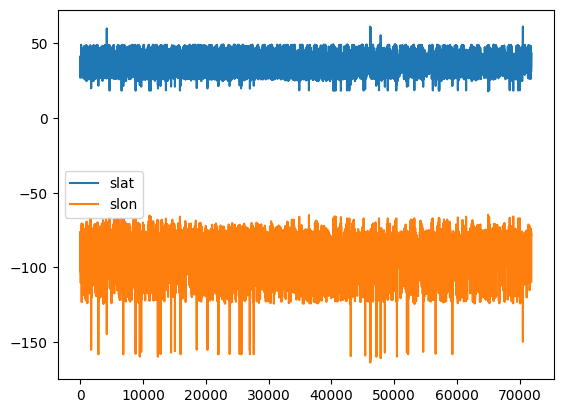

In [5]:
df_subset = df[['slon', 'slat']]

df_subset.plot()

We can make this a little more useful by recognizing that ```slon``` (starting longitude) and ```slat```(starting latitude) are actually pairs values belonging to the same position, so they should not be plotted separately.

We can specifically tell Python to use the ```scatter()``` method (scatterplot) and specify that one of the variables as the "x" coordinate and the other as the "y" coordinate. We do not need to use the subset if we specify the x and y coordinates.

Interestingly (and not surprisingly), the scatterplots show the outline of the United States (including Hawaii, Alaska, and Puerto Rico).

<Axes: xlabel='slon', ylabel='slat'>

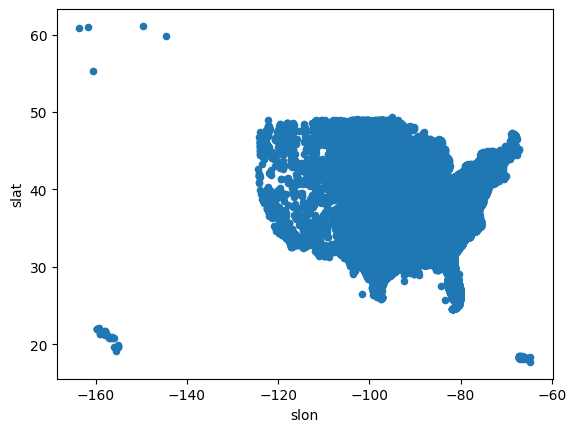

In [13]:
df.plot.scatter(x='slon', y='slat')

We can customize the scatterplot exactly in the way you would customize a ```matplotlib``` scatterplot.

We can change the size of the points, set the color range to the ```mag``` column to vary the color depending on the F/EF scale (and remove EF-U / -9), and zoom in on the Conterminous United States.

NOTE: You can see all of the ```matplotlib``` colormaps at this link: [```matplotlib``` colormaps](https://matplotlib.org/stable/users/explain/colors/colormaps.html). I use the ```YlGnBu``` colormap from the image provided at that website (see below). You should use sequential colormaps for most geoscience applications.

![mplcolor](https://matplotlib.org/stable/_images/sphx_glr_colormaps_002.png)

<Axes: xlabel='slon', ylabel='slat'>

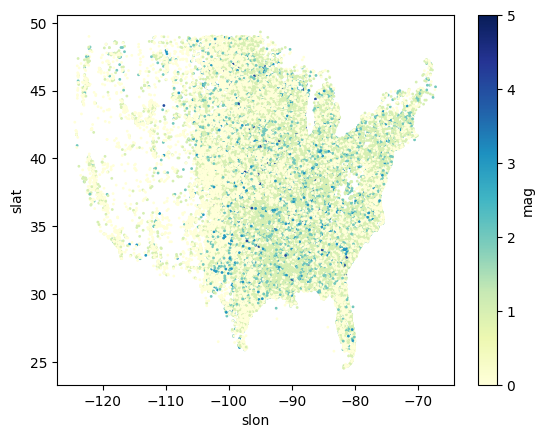

In [29]:
# get reports within the longitude and latitude range
df_lower_48 = df[(df.slon > -125) & (df.slon < -65) & (df.slat > 24) & (df.slat < 50)]

# get reports that have a magnitude of 0 or higher
df_lower_48_filtered = df_lower_48[(df_lower_48.mag >= 0)]

# plot a scatterplot with customizations for size (```s```), color (```c````), and colormap
df_lower_48_filtered.plot.scatter(x='slon', y='slat', s=1, c='mag', cmap='YlGnBu')

### Chapter 6.4.2 - Climatology Visualizations

Some of you might want to look at the climatology of tornadoes, either this semester or in the future.

What are some questions we might ask? Here are some examples:

1. What is the typical count of tornadoes per year?
2. What state has experienced the most tornadoes?
3. What month experiences the most tornadoes?
4. What hour of the day experiences the most tornadoes?

First, we want to subset the tornado dataset for a period in which the data are relatively ```stationary```. In this case, we do not want to introduce observational bias into our analysis.

We can plot the count of tornadoes per year to see if there is a temporal bias:

#### Line graph example: tornado dataset

<Axes: xlabel='yr'>

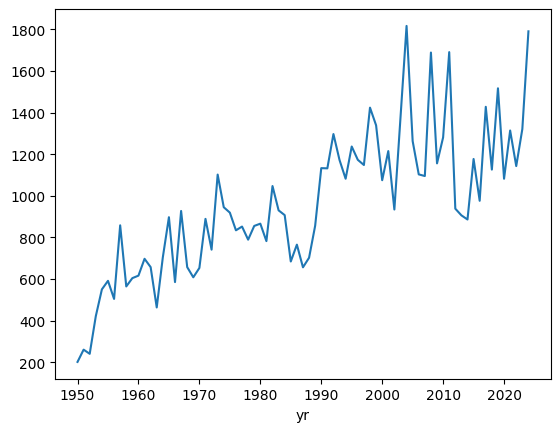

In [36]:
# groupby: reorganize the data into subsets, where each subset shares the same value in the 'yr' column
# size: for each group, count the number of rows (number of tornadoes in this case)
year = df.groupby('yr').size()

# a line graph of one variable (size/count) can be easily plotted
year.plot()

**We notice that there is a strong temporal trend.** 

Is this trend real? We can examine this by looking at EF1 or greater tornadoes only. These types of tornadoes are more reliably observed throughout the tornado dataset record.

We can subset the dataset to only give us EF1 or greater storms, and then recreate the plot.

Notice how we create a new variable ```ef1``` and then **use that variable** to perform the ```groupby```.

This is very important, because if we use the original ```df``` variable, we will be considering **all** the data, not just rows with a magnitude of 1 or larger.

<Axes: xlabel='yr'>

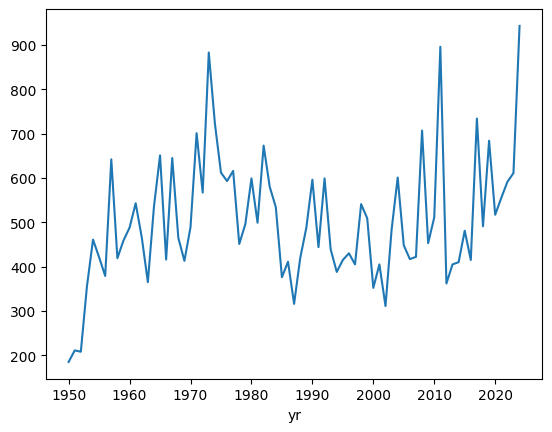

In [38]:
# filter so we have only those storms that are at least F/EF1
ef1 = df[df['mag'] >= 1]

# groupby: reorganize the data into subsets, where each subset shares the same value in the 'yr' column
# size: for each group, count the number of rows (number of tornadoes in this case)
ef1_yr = ef1.groupby('yr').size()

ef1_yr.plot()

### ```groupby``` on a filtered subset example: tornado dataset (counts of tornadoes by year)

We can see that the trend has been removed after approximately 1960. This is a well-known finding in the dataset, and it is generally a good idea to only consider stronger (EF1+) tornadoes, since those usually do enough damage to be noticed, whether it is in 1965 or 1995.

Moving forward, lets only examine tornadoes with a magnitude of F/EF1 or greater and only after 1960.

Notice how we take ```ef1``` (which is a subset of rows where magnitude is 1 or greater), and apply a second filter (only rows were the year is 1960 or greater).

This result is set equal to a variable named ```ef1_1960_2023```. 

**We use this variable to perform the statistical calculations moving forward, not ```ef1``` or ```df```.**

<Axes: xlabel='yr'>

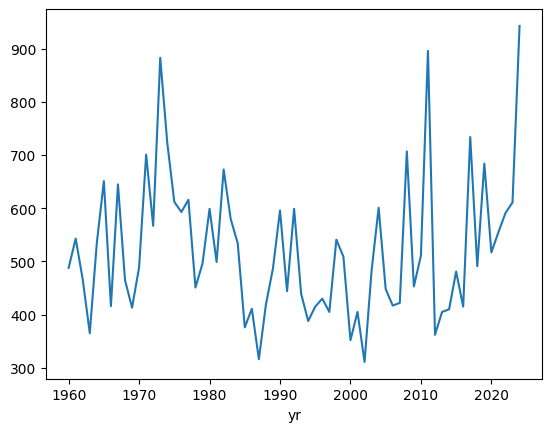

In [39]:
ef1_1960_2023 = ef1[ef1['yr'] >= 1960]

ef1_1960_2023_yr = ef1_1960_2023.groupby('yr').size()

ef1_1960_2023_yr.plot()

#### Bar graph example: tornado dataset (counts of tornadoes by year)

If we instead want to visualize this as a barchart, it is very simple to change:

<Axes: xlabel='yr'>

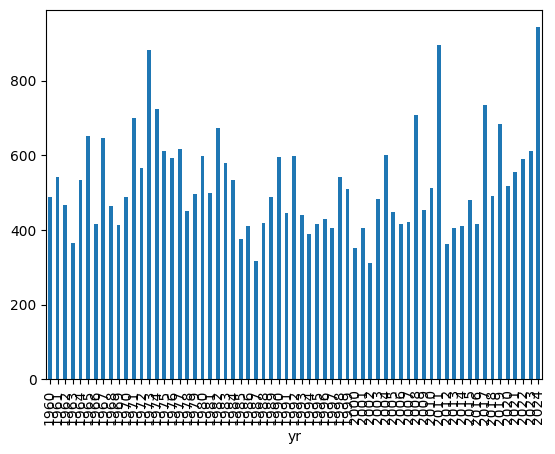

In [40]:
ef1_1960_2023_yr.plot.bar()

### Changing the size of the figure example: tornado dataset (counts of tornadoes by year)

The years are kind of hard to read, so we can also change the figure size by using the ```bar()``` parameter named ```figsize``` which takes a ```tuple``` that defines the size of the figure in the pattern of ```(width, height)```:

In other words, ```figsize=(15, 10)``` makes a figure of size 15 by size 10.

This sometimes takes some tweaking to get it just right, so feel free to change those numbers to create a plot that you like looking at.

<Axes: xlabel='yr'>

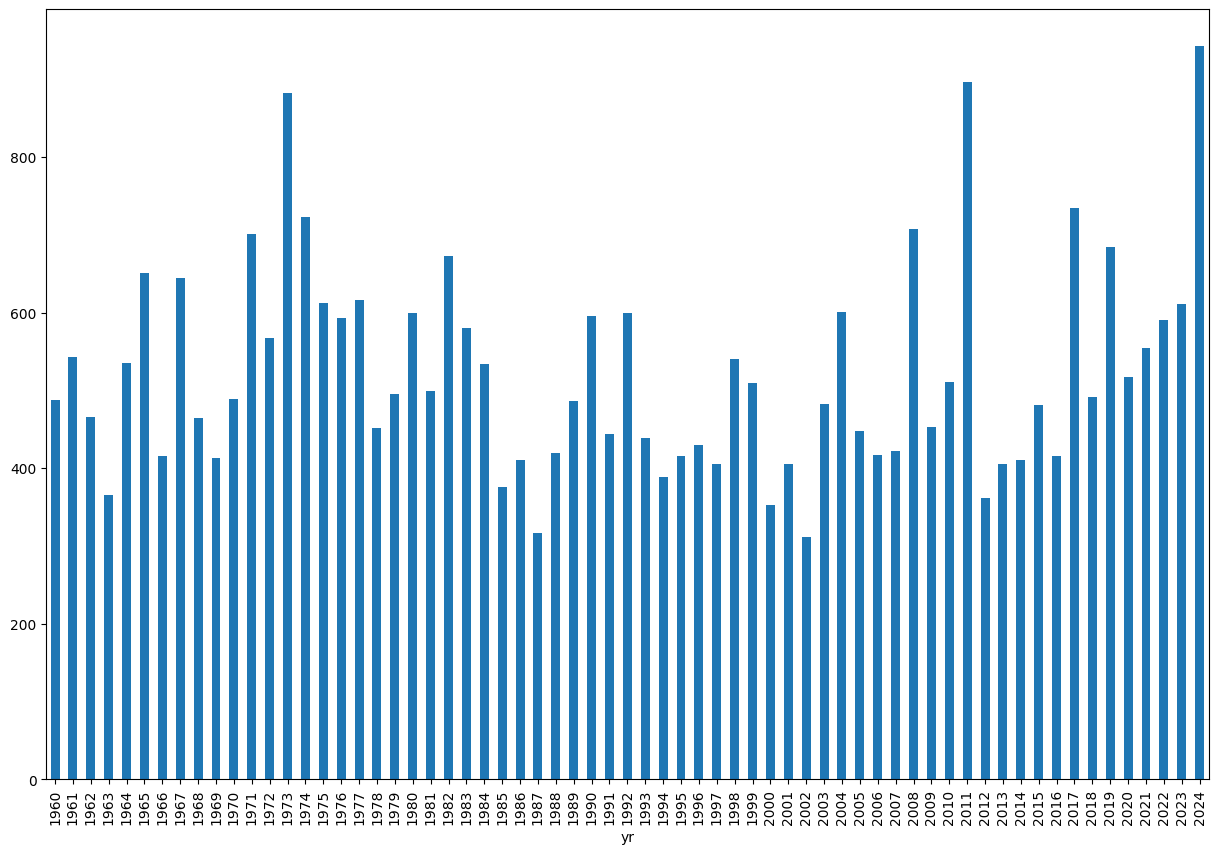

In [42]:
ef1_1960_2023_yr.plot.bar(figsize=(15, 10))

#### Histogram example: tornado dataset (counts of tornadoes by year)

We can create a histogram to get an idea of the typical year and spread of annual EF1+ tornado counts:

<Axes: ylabel='Frequency'>

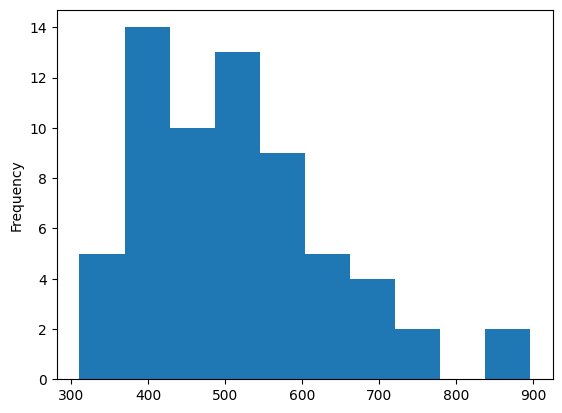

In [7]:
ef1_1960_2023_yr.plot.hist()

This suggests that there are typically 400 - 600 EF1+ tornadoes in any given year, with a long tail that reaches ~900.

What years have over 800 EF1+ tornadoes?

In [8]:
ef1_1960_2023_yr[ef1_1960_2023_yr > 800]

yr
1973    883
2011    896
dtype: int64

We see the top year is 2011, which was no doubt influenced by the events of April 27th, 2011.

#### Boxplot example: tornado dataset (counts of tornadoes by year)

We can also describe this using boxplots:

<Axes: >

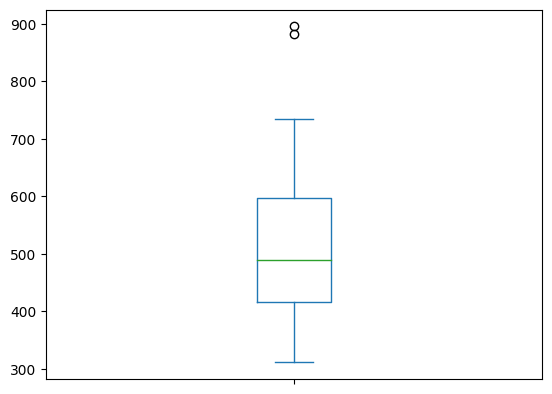

In [9]:
ef1_1960_2023_yr.plot.box()

#### 2D Histogram/Hexbin example: tornado dataset (tornado lat/lons)

We can combine the first example (tornado points) with the histogram (count of events within each range of values) to create a 2D histogram.

How to read this plot: the hexagrams with darker green colors contain more starting lat (```slat```) and starting lon (```slon```) coordinate pairs than other locations. Even without the state borders, we can see tornado frequency maximums in the Great Plains and Southeast U.S.

<Axes: xlabel='slon', ylabel='slat'>

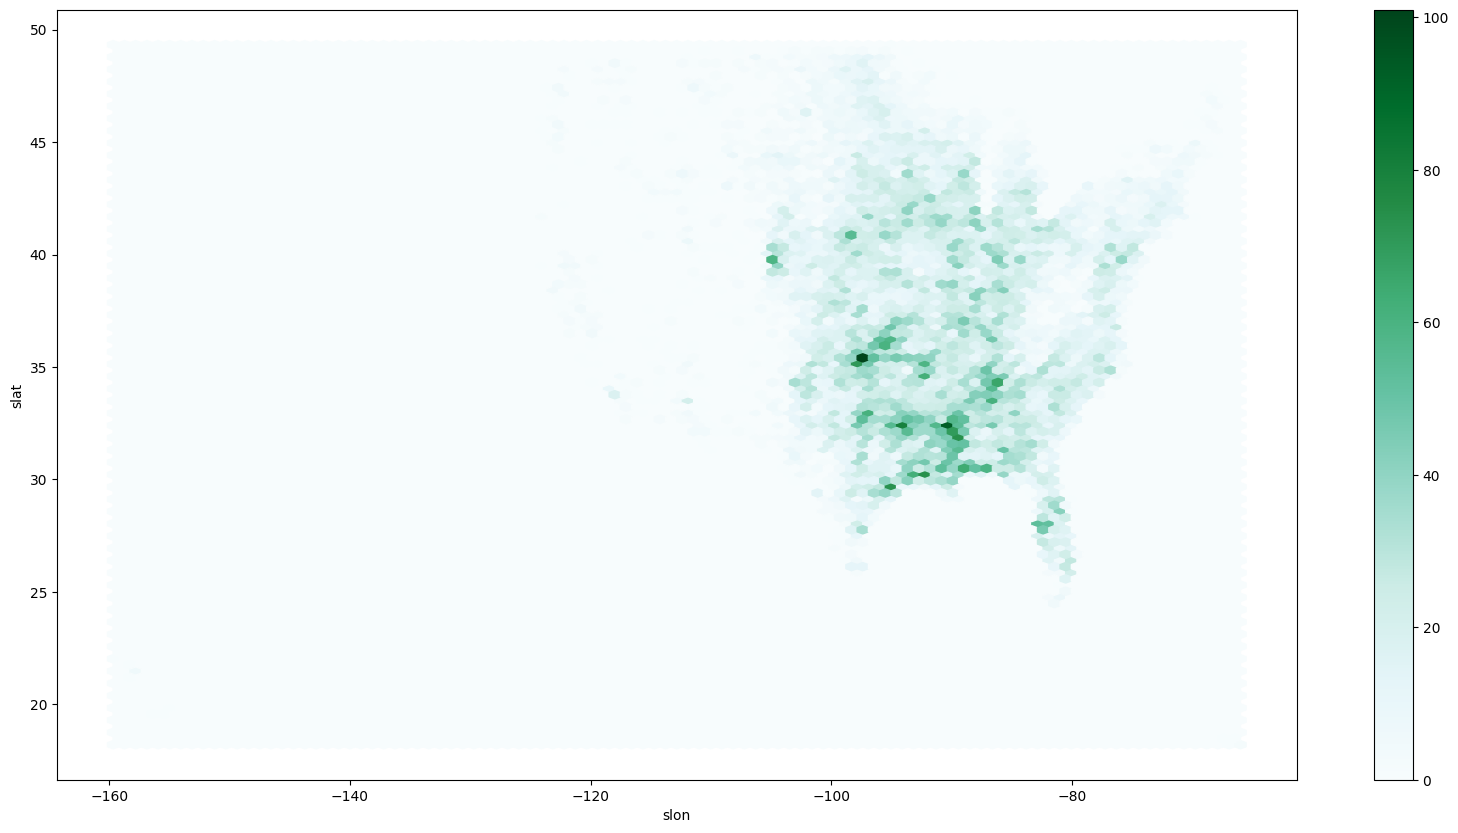

In [43]:
ef1_1960_2023[['slon', 'slat']].plot.hexbin(x='slon', y='slat', figsize=(20, 10))

#### Pie chart example: tornado dataset (proportion of tornadoes in each ```mag``` category)

You can see what proportion of deaths are associated with each F/EF magnitude:

<Axes: ylabel='fat'>

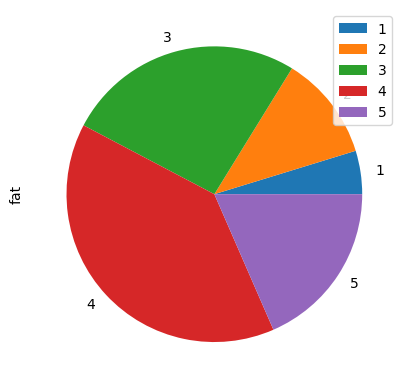

In [12]:
deaths_per_mag = ef1_1960_2023[['fat', 'mag']].groupby('mag').sum()

deaths_per_mag.plot.pie(y='fat')

### Chapter 6.4.3 - Practice

Include specific code that prints out the answer.

What is the average count of tornadoes per year?

What state has experienced the most tornadoes?

What month experiences the most tornadoes?

What hour of the day experiences the most tornadoes?